In [799]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [800]:
df=pd.read_csv('questions.csv')
df.shape

(404351, 6)

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [802]:
#to select randomly data
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
379715,379715,742667,742668,Will there be a problem in the Indian Army SSB...,Is a high level of testosterone a problem in m...,0
165640,165640,327403,327404,Is the rum for winters only?,Where can I buy Old Monk rum near Tambaram?,0
317764,317764,623506,623507,What suggestions can be considered for improvi...,How can Indian Education system be reformed?,1
384123,384123,751122,751123,How do I raise a puppy well?,How do I raise a puppy?,1
73560,73560,146175,146176,Can you list the best appns for smartphones?,"In Game of Thrones, since Catelyn let Jon live...",0


In [803]:
#missing values
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())
#duplicate rows
print(df.duplicated().sum())

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
0


is_duplicate
0    255042
1    149306
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

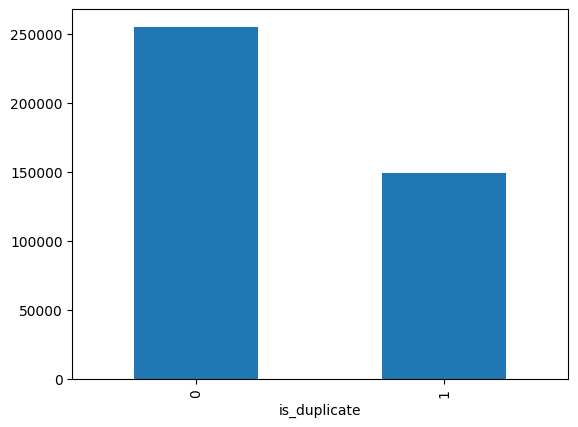

In [804]:
#checking balancing of a dataset
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [805]:
#Repeated questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('no.of unique questions',np.unique(qid).shape[0]) # shape will tell about no of rows
repeated_qids = qid.value_counts()[qid.value_counts() > 1]
print('Number of repeated questions:', repeated_qids.shape[0])

no.of unique questions 789795
Number of repeated questions: 13698


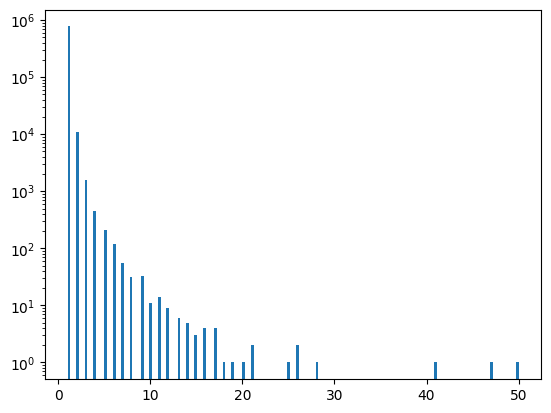

In [806]:
#repeated question histogram
plt.hist(qid.value_counts(),bins=160) #bins=160 means the range of frequencies is divided into 160 buckets 
plt.yscale('log')
plt.show()

In [807]:
#q1,q2 column pr BOW apply and is_duplicate as an y
#minimizing the datset as well
new_df=df.sample(5000)
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
89662,What is the fastest way to thaw chicken?,How do you thaw chicken?
106869,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...
323033,What Is the impact of Brexit on your country a...,What impact Brexit will have on India?
16655,What is most important in life?,What is the best in life?
220539,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...


In [808]:
#applying BOW in Questions
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=1000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)


In [809]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
print(temp_df.shape)
temp_df.head(2)

(5000, 2000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
89662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
106869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [810]:
#adding output column to this dataframe
temp_df['is_duplicate']=new_df['is_duplicate']
temp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,is_duplicate
89662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
106869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [811]:
from sklearn.model_selection import train_test_split
x=temp_df.iloc[:,:-1]
y=temp_df['is_duplicate']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.isnull().sum()


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 2000, dtype: int64

In [812]:
#calculating accuracy_score#
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.705

In [813]:
#Now we re adding more feature to improve the accuracy(Feature engineering)
#adding 2 new feature 
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
89662,89662,178028,178029,What is the fastest way to thaw chicken?,How do you thaw chicken?,0,40,24
106869,106869,211954,211955,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...,0,64,74


In [814]:
#adding 4 new feature
#total words in q1,q2
#words common->%age of common unique words
#words total->total words in q1+ total words in q2
#word share=word common/word total
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda rw: len(rw.split(" ")))
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
89662,89662,178028,178029,What is the fastest way to thaw chicken?,How do you thaw chicken?,0,40,24,8,5
106869,106869,211954,211955,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...,0,64,74,12,13


In [815]:
#%age of common unique words ....set will remove duplicates
#map(function, iterable) applies the function to each item in the iterable.
set(map(lambda word:word.lower().strip(),"I am poor I am rich ".split(" ")))

{'', 'am', 'i', 'poor', 'rich'}

In [816]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1.intersection(w2)) #intersection
new_df['word_common']=new_df.apply(common_words ,axis=1) #axis=1 means rowwise
new_df.head(2)
    

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
89662,89662,178028,178029,What is the fastest way to thaw chicken?,How do you thaw chicken?,0,40,24,8,5,2
106869,106869,211954,211955,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...,0,64,74,12,13,7


In [817]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2)) 
new_df['total_words']=new_df.apply(total_words ,axis=1)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
89662,89662,178028,178029,What is the fastest way to thaw chicken?,How do you thaw chicken?,0,40,24,8,5,2,13
106869,106869,211954,211955,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...,0,64,74,12,13,7,23


In [818]:
#word share=word common/word total
new_df['word-share']=round(new_df['word_common']/new_df['total_words'],2)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share
89662,89662,178028,178029,What is the fastest way to thaw chicken?,How do you thaw chicken?,0,40,24,8,5,2,13,0.15
106869,106869,211954,211955,What are the good ways to eradicate the beggin...,What can the younger generation do to eradicat...,0,64,74,12,13,7,23,0.30


In [819]:
#creating final database
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head(2)

(5000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share
89662,0,40,24,8,5,2,13,0.15
106869,0,64,74,12,13,7,23,0.30


In [820]:
ques_df=new_df[['question1','question2']]
ques_df.head()
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=1000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape) # extra 7 feature get added
final_df.head(2)

(5000, 2008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share,0,1,...,990,991,992,993,994,995,996,997,998,999
89662,0,40,24,8,5,2,13,0.15,0,0,...,0,0,0,0,0,1,0,0,0,0
106869,0,64,74,12,13,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [821]:
from sklearn.model_selection import train_test_split
x1=final_df.iloc[:,1:].values
y1=final_df.iloc[:,0].values
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)


In [822]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X1_train,y1_train)
y1_pred=rf.predict(X1_test)
accuracy_score(y1_test,y1_pred) #accuracy gets increased   df['age'] → type: pandas.Series
                                                           #df['age'].values → type: numpy.ndarray

0.73

In [823]:
# now we are applying basic preprocessing and token feature
def preprocess(q):
    # lowercase and removing whitespaces
    q=str(q).lower().strip()
    #replace certain specialcharacters with their string equivalents
    q=q.replace('%','percent')
    q=q.replace('$','dollar')
    q=q.replace('@','at')
    q.replace('ve',"have")
    #the pattern '[math]' appars around 900 times in the whole dataset.
    q=q.replace('[math]',' ')
 #decontracting words
#https://stackoverflow.com/a/19794953
    contractions = { 
    "'ve":   "have",
    "wasn't":"was not",    
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_deconcate=[]
    for word in q.split():
        if word in contractions:
            word=contractions[word]
        q_deconcate.append(word)

    q=' '.join(q_deconcate)
    q=q.replace("'ve","have")
    q=q.replace("wasn't","was not")
    #removing HTML tags
    from bs4 import BeautifulSoup
    q=BeautifulSoup(q)
    q=q.get_text() 
    #removing punctuations
    import string
    exclude=string.punctuation
    q=q.translate(str.maketrans('','',exclude))
    return q

In [824]:
df=pd.read_csv('questions.csv')
new_df=df.sample(5000)
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

C:\Users\mishr\AppData\Local\Temp\ipykernel_24196\4127628365.py:146: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)


In [825]:
preprocess("I've already! wasn't<b>/")

'ihave already was not'

In [826]:
# noe repeating the above steps
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda rw: len(rw.split(" ")))
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1.intersection(w2)) #intersection
new_df['word_common']=new_df.apply(common_words ,axis=1)

def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2)) 
new_df['total_words']=new_df.apply(total_words ,axis=1)
new_df['word-share']=round(new_df['word_common']/new_df['total_words'],2)

new_df.head(4)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share
57608,57608,114615,114616,does time depend on gravity,does gravity depend on time,0,27,27,5,5,5,10,0.50
27059,27059,25948,53959,who are studentlistcoms competitors,does stampscom have any competitors,0,35,35,4,5,1,9,0.11
153647,153647,303897,303898,what is a nontechnical class that all engineer...,do i need to take a math class in college,0,126,41,20,10,6,29,0.21
142480,142480,282002,282003,is facebook a waste of time and also unproductive,is using facebook is waste of time,1,49,34,9,7,5,15,0.33


In [827]:
#Advanced Feature
from nltk.corpus import stopwords
def fetch_token_features(row):
    q1=row['question1']
    q2=row['question2']
    safe_div=0.001
    stop_words=stopwords.words("english")
    token_feature=[0.0]*8    #bcoz 8 feqature will return
    #converting the sentence into tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if len(q1_tokens)==0 or len(q2_tokens)==0: # if any token len is 0 then it will do all 8 feature 0 that why o list is created 
        return token_features

    #Get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens  if word not in stop_words])
    q2_words=set([word for word in q2_tokens  if word not in stop_words])
    
    #Get the stopwords in questions
    q1_stops=set([word for word in q1_tokens  if word  in stop_words])
    q2_stops=set([word for word in q2_tokens  if word  in stop_words])
    
    #Get the common non-stopwords from question pairs
    common_word_count=len(q1_words.intersection(q2_words))

    #Get the common stopwords from question pairs
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
                          
    #Get the common tokens from question pair  # safe div is added to not produce error when denominator is 0
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+safe_div)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+safe_div)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+safe_div)
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+safe_div)
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+safe_div)
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+safe_div)

    #last words of both question is same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    #first words of both question is same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_feature
    

In [828]:
token_features =new_df.apply(fetch_token_features,axis=1)
#axis=1 means the function is applied row-wise
#So df['question1'] is just the value in the 'question1' column for that row — a single question string (not the entire column).

#lambda x: x[0]
#This is a lambda function, or anonymous function.
#It means: for input x, return x[0] (i.e., the first element).

# map(lambda x: x[0], token_features)
#This applies the lambda to every element in token_features.
#So it extracts the first value from each tuple.

new_df["cwc_min"]= list(map(lambda x:x[0],token_features))
new_df["cwc_max"]= list(map(lambda x:x[1],token_features))
new_df["csc_min"]= list(map(lambda x:x[2],token_features))
new_df["csc_max"]= list(map(lambda x:x[3],token_features))
new_df["ctc_min"]= list(map(lambda x:x[4],token_features))
new_df["ctc_max"]= list(map(lambda x:x[5],token_features))
new_df["last_word_eq"]=list(map(lambda x: x[6],token_features))
new_df["first_word_eq"]=list(map(lambda x: x[7],token_features))
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word-share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
57608,57608,114615,114616,does time depend on gravity,does gravity depend on time,0,27,27,5,5,...,10,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27059,27059,25948,53959,who are studentlistcoms competitors,does stampscom have any competitors,0,35,35,4,5,...,9,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153647,153647,303897,303898,what is a nontechnical class that all engineer...,do i need to take a math class in college,0,126,41,20,10,...,29,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [829]:
!pip install distance

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [830]:
#LENGTH BASED FEATURE
import distance
def fetch_length_features(row):
    q1=row['question1']
    q2=row['question2']
    length_features=[0.0]*3
    #converting the sentence into tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    #absolute length features
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
    
    #average token length of both questions
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
    
    #distance.lcsubstrings(q1, q2) → finds the longest text chunk that appears in both questions.
    #subs[0] → grabs one of those longest chunks (they’re all the same length).
    
    str=list(distance.lcsubstrings(q1,q2))
    length_features[2]=len(str[0])/(min(len(q1),len(q2))+1)
    return length_features

In [831]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))
new_df.head(4)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
57608,57608,114615,114616,does time depend on gravity,does gravity depend on time,0,27,27,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.392857
27059,27059,25948,53959,who are studentlistcoms competitors,does stampscom have any competitors,0,35,35,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.5,0.333333
153647,153647,303897,303898,what is a nontechnical class that all engineer...,do i need to take a math class in college,0,126,41,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,15.0,0.261905
142480,142480,282002,282003,is facebook a waste of time and also unproductive,is using facebook is waste of time,1,49,34,9,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8.0,0.400000


In [832]:
!pip install fuzzywuzzy



Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [833]:
#fuzzy Features
#from fuzzywuzzy import fuzz
from fuzzywuzzy.fuzz import QRatio, partial_ratio, token_sort_ratio, token_set_ratio
def fetch_fuzzy_features(row):
    q1=row['question1']
    q2=row['question2']

    fuzzy_features=[0.0]*4
    #fuzz_ratio
    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    #fuzz_partial_ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
    #token_sort_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
    #token-set_ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features
    

In [834]:
fuzzy_features=new_df.apply(fetch_fuzzy_features,axis=1)

new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort__ratio']=list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[3],fuzzy_features))
new_df.head(4)



,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort__ratio,token_set_ratio
57608,57608,114615,114616,does time depend on gravity,does gravity depend on time,0,27,27,5,5,...,0.0,0.0,0.0,0,5.0,0.392857,67,67,100,100
27059,27059,25948,53959,who are studentlistcoms competitors,does stampscom have any competitors,0,35,35,4,5,...,0.0,0.0,0.0,1,4.5,0.333333,60,60,57,60
153647,153647,303897,303898,what is a nontechnical class that all engineer...,do i need to take a math class in college,0,126,41,20,10,...,0.0,0.0,0.0,10,15.0,0.261905,29,54,41,78
142480,142480,282002,282003,is facebook a waste of time and also unproductive,is using facebook is waste of time,1,49,34,9,7,...,0.0,0.0,0.0,2,8.0,0.400000,63,76,67,89


In [835]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head(2)

(5000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort__ratio,token_set_ratio
57608,0,27,27,5,5,5,10,0.50,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0.392857,67,67,100,100
27059,0,35,35,4,5,1,9,0.11,0.0,0.0,...,0.0,0.0,0.0,1,4.5,0.333333,60,60,57,60


In [836]:
import numpy as np
ques_df=new_df[['question1','question2']]
ques_df.head()
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=4000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df3=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df4=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df3,temp_df4],axis=1)
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape) # extra 7 feature get added
final_df.head(2)

(5000, 8023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word-share,cwc_min,cwc_max,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
57608,0,27,27,5,5,5,10,0.50,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27059,0,35,35,4,5,1,9,0.11,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [837]:
from sklearn.model_selection import train_test_split
xf=final_df.iloc[:,1:].values
yf=final_df.iloc[:,0].values
X2_train,X2_test,y2_train,y2_test=train_test_split(xf,yf,test_size=0.2,random_state=42)


In [838]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X2_train,y2_train)
y1_pred=rf.predict(X2_test)
accuracy_score(y2_test,y1_pred) #accuracy gets increased 

0.738

In [839]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [840]:
#XGBoost stands for eXtreme Gradient Boosting.It builds a series of decision trees — each new tree tries to fix the mistakes made by the previous ones.
#Start with a simple prediction (like average or guess)
#Build a tree that predicts the errors (called residuals)
#Repeat: Add more trees that fix the remaining errors
#→ final prediction = sum of all tree predictions

from xgboost  import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X2_train,y2_train)
y3_pred1=xgb.predict(X2_test)
accuracy_score(y2_test,y3_pred1)

0.734

In [841]:
from sklearn.metrics import confusion_matrix
#for random forest model
confusion_matrix(y2_test,y1_pred)

array([[537,  78],
       [184, 201]])

In [842]:
#for xgboost model
confusion_matrix(y2_test,y3_pred1) #78<114 so we take randomforestclassifier

array([[493, 122],
       [144, 241]])

In [843]:
def query_point_creator(q1,q2):
    input_query=[]
    #preprocess
    q1=preprocess(q1)
    q2=preprocess(q2)  #preprocess is a fucn created by us previously
    #fetch basic feature
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    #creating funcn which take input as a string not as a dataframe

    def common_words_str(q1, q2):
        w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
        return len(w1.intersection(w2))

    def total_words_str(q1, q2):
        w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
        return len(w1) + len(w2)



    input_query.append(common_words_str(q1,q2))
    input_query.append(total_words_str(q1,q2))
    input_query.append(round(common_words_str(q1,q2)/total_words_str(q1,q2),2))


    from nltk.corpus import stopwords

    def fetch_token_features_str(q1, q2):
        safe_div = 0.001
        stop_words = stopwords.words("english")
        token_features = [0.0] * 8  # 8 features
    
        # Convert to tokens
        q1_tokens = q1.split()
        q2_tokens = q2.split()
    
        # If any question is empty, return default 0s
        if len(q1_tokens) == 0 or len(q2_tokens) == 0:
            return token_features
    
        # Non-stopwords
        q1_words = set([word for word in q1_tokens if word not in stop_words])
        q2_words = set([word for word in q2_tokens if word not in stop_words])
    
        # Stopwords
        q1_stops = set([word for word in q1_tokens if word in stop_words])
        q2_stops = set([word for word in q2_tokens if word in stop_words])
    
        # Common counts
        common_word_count = len(q1_words & q2_words)
        common_stop_count = len(q1_stops & q2_stops)
        common_token_count = len(set(q1_tokens) & set(q2_tokens))
    
        # Calculating features
        token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + safe_div)
        token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + safe_div)
        token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + safe_div)
        token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + safe_div)
        token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + safe_div)
        token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + safe_div)
    
        # First and last word match
        token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
        token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
        return token_features


    #fetch token feature
    token_features=fetch_token_features_str(q1,q2)
    input_query.extend(token_features)

    #fetch length based features
    import distance
    def fetch_length_features_str(q1,q2):
        length_features=[0.0]*3
        #converting the sentence into tokens:
        q1_tokens=q1.split()
        q2_tokens=q2.split()
        
        if len(q1_tokens)==0 or len(q2_tokens)==0:
            return length_features
        #absolute length features
        length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
        
        #average token length of both questions
        length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
        
        str=list(distance.lcsubstrings(q1,q2))
        length_features[2]=len(str[0])/(min(len(q1),len(q2))+1)
        return length_features


    
    length_features =fetch_length_features_str(q1,q2)
    input_query.extend(length_features)

    #fuzzy feature

    def fetch_fuzzy_features_str(q1,q2):

        fuzzy_features=[0.0]*4
        #fuzz_ratio
        fuzzy_features[0]=fuzz.QRatio(q1,q2)
    
        #fuzz_partial_ratio
        fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
        #token_sort_ratio
        fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
        #token-set_ratio
        fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)
    
        return fuzzy_features

    #fetch_length based feature  
    fuzzy_features =fetch_fuzzy_features_str(q1,q2)
    input_query.extend(fuzzy_features)

    #bow feature for q1
    q1_bow=cv.transform([q1]).toarray()

    #bow_feature for q2
    q2_bow=cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

     
    

                  

In [844]:
q1='what is core idea of socialism?'
q2='what is the core idea behind socialism?'
query_point_creator(q1,q2).shape

(1, 8022)

In [845]:
print(rf.predict(query_point_creator(q1,q2)))

[1]


In [847]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))